# <font color=green> **AULA PRÁTICA 3**
-----

## Objetivo:
Como gerar uma instância reduzida (toy)

## Tópicos:
1.  Concatenando todas as instâncias do Rio de Janeiro 
2.  Trabalhando com os dados de todas as instâncias instancia_rj0
3.  Gerador de subinstâncias
5.  Resumo de todos os processos para gerar o toy

Fonte de dados:
https://github.com/loggi/loggibud



### 1 - Criação do Dataframe Geral

* **Análise de todas as instâncias :**

Para analisar os dados de todas as instâncias CVRP para cada estado, juntamos todos os arquivos RJ em um mesmo dataframe. O objetivo era verificar a relação dos pontos e demandas ao longo das instâncias.

#### 1.1 - Concatenando as instâncias

In [ ]:
import pandas as pd
import json
import os
import numpy as np

# Entradas: 

## 1 - diretorio onde estão os arquivos cvrp-instances-1.0/train
diretorio_arquivos = '/content/drive/Shareddrives/Disciplina Modelagem/data/cvrp-instances-1.0/train'
## 2 - nome das instâncias do rj que queremos
instancias_rj = ['rj-0','rj-1','rj-2','rj-3','rj-4','rj-5']


# Código:

df_geral = pd.DataFrame()     ## criar inicialmente um dataframe vazio
for inst in instancias_rj:    # para cada instância rj-
  diretorio1 = diretorio_arquivos + '/'+ inst         # chama o diretório 
  arquivos = os.listdir(diretorio1)                   # lista os arquivos dentro da pasta diretorio1
  

  for arquivo in arquivos:     # para cada um dos arquivos dentro da pasta diretorio 1:
    
    # lendo arquivo
    diretorio2 = diretorio1 +'/'+ arquivo
    data = json.load(open(diretorio2))

    # transformando para dataframe
    df_entregas = pd.DataFrame(data['deliveries'])

    # adicionando colunas a df_entregas
    df_entregas['name'] = np.repeat(data['name'],len(df_entregas))      # nome da instância
    df_entregas['origin'] = np.repeat(data['origin'],len(df_entregas))  # depósito de origem
    df_entregas['region'] = np.repeat(data['region'],len(df_entregas))  # região da instância (rj-0,rj-1,...)
    df_entregas['vehicle_capacity'] = np.repeat(data['vehicle_capacity'],len(df_entregas))   # capacidade do veículo

    # concatenando dataframes
    df_geral = pd.concat([df_geral, df_entregas],ignore_index= 'True')
df_geral

In [11]:
df_geral.head()

,id,point,size,name,origin,region,vehicle_capacity
0,8f6abd1e06bd7704feac404a445094e1,"{'lng': -43.10803774439438, 'lat': -22.8636103...",3,cvrp-0-rj-0,"{'lng': -43.09887838388887, 'lat': -22.8662298...",rj-0,180
1,e394f05d92650ed1512dabaadc9295d5,"{'lng': -43.08997527513803, 'lat': -22.8622082...",8,cvrp-0-rj-0,"{'lng': -43.09887838388887, 'lat': -22.8662298...",rj-0,180
2,40f1c2db50c9697c3c1254f89d007f60,"{'lng': -43.09614479044607, 'lat': -22.8635209...",1,cvrp-0-rj-0,"{'lng': -43.09887838388887, 'lat': -22.8662298...",rj-0,180
3,630983abc40e566355d993a11fee0973,"{'lng': -43.094907911605844, 'lat': -22.855667...",6,cvrp-0-rj-0,"{'lng': -43.09887838388887, 'lat': -22.8662298...",rj-0,180
4,ec64e4ae52e564dddc9bb5f695223a,"{'lng': -43.09954677964522, 'lat': -22.8633098...",9,cvrp-0-rj-0,"{'lng': -43.09887838388887, 'lat': -22.8662298...",rj-0,180


#### 1.2 - Exportando o dataframe gerado com o nome instancia_rj.csv

In [ ]:
# salvando em uma pasta do drive
salvar = '/content/drive/Shareddrives/Disciplina Modelagem'
nome_arquivo = 'instancia_rj.csv'
df_geral.to_csv(salvar + '/' + nome_arquivo)

#### 1.3 - Importando o arquivo gerado (instancia_rj.csv)

In [ ]:
import pandas as pd

In [ ]:
df_geral = pd.read_csv('/content/drive/Shareddrives/Disciplina Modelagem/Aulas/Aula 3/instancia_rj.csv',index_col=0)

/usr/local/lib/python3.7/dist-packages/numpy/lib/arraysetops.py:580: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


In [ ]:
df_geral.head(3)

,id,point,size,name,origin,region,vehicle_capacity
0,8f6abd1e06bd7704feac404a445094e1,"{'lng': -43.10803774439438, 'lat': -22.8636103...",3,cvrp-0-rj-0,"{'lng': -43.09887838388887, 'lat': -22.8662298...",rj-0,180
1,e394f05d92650ed1512dabaadc9295d5,"{'lng': -43.08997527513803, 'lat': -22.8622082...",8,cvrp-0-rj-0,"{'lng': -43.09887838388887, 'lat': -22.8662298...",rj-0,180
2,40f1c2db50c9697c3c1254f89d007f60,"{'lng': -43.09614479044607, 'lat': -22.8635209...",1,cvrp-0-rj-0,"{'lng': -43.09887838388887, 'lat': -22.8662298...",rj-0,180


In [ ]:
# quando fizemos a importação por csv, os dados da coluna 'point' ficaram no formato string. Por exemplo:
print(f"Valor point na linha 0: {df_geral.loc[0,'point']}")
print(f"Tipo do valor: {type(df_geral.loc[0,'point'])}")

Valor point na linha 0: {'lng': -43.10803774439438, 'lat': -22.863610319183422}
Tipo do valor: <class 'str'>


Como separar os valores se eles estão como string?

In [ ]:
# separando a latitude
float(df_geral.loc[0,'point'].split(':')[2][:-1])

-22.863610319183422

In [ ]:
# separando a longitude
float(df_geral.loc[0,'point'].split(':')[1].split(',')[0])

-43.10803774439438

In [ ]:
# gerando duas colunas (latitude e longitude)
df_geral['longitude'] = df_geral['point'].apply(lambda x: float(x.split(':')[1].split(',')[0]))
df_geral['latitude'] = df_geral['point'].apply(lambda x: float(x.split(':')[2][:-1]))

In [ ]:
# tamanho do dataframe (linhas,colunas)
df_geral.shape

(2586123, 9)

In [ ]:
df_geral.head(3)

,id,point,size,name,origin,region,vehicle_capacity,longitude,latitude
0,8f6abd1e06bd7704feac404a445094e1,"{'lng': -43.10803774439438, 'lat': -22.8636103...",3,cvrp-0-rj-0,"{'lng': -43.09887838388887, 'lat': -22.8662298...",rj-0,180,-43.108038,-22.863610
1,e394f05d92650ed1512dabaadc9295d5,"{'lng': -43.08997527513803, 'lat': -22.8622082...",8,cvrp-0-rj-0,"{'lng': -43.09887838388887, 'lat': -22.8662298...",rj-0,180,-43.089975,-22.862208
2,40f1c2db50c9697c3c1254f89d007f60,"{'lng': -43.09614479044607, 'lat': -22.8635209...",1,cvrp-0-rj-0,"{'lng': -43.09887838388887, 'lat': -22.8662298...",rj-0,180,-43.096145,-22.863521


#### 1.3 - Filtrando apenas os dados da pasta rj-0

Percebemos que cada pasta (rj-0, rj-1,...) tem a ver com uma região de atendimento no Rio. Separamos essa região para trabalhar somente com ela

In [ ]:
region = 'rj-0'
df_rj0 = df_geral.loc[df_geral['region'] == region,:]

In [ ]:
# Exportando arquivo da pasta rj-0
salvar1 = '/content/drive/Shareddrives/Disciplina Modelagem/Aulas/Aula 3'
nome_arquivo = 'instancia_rj0.csv'
df_rj0.to_csv(salvar1 + '/' + nome_arquivo)

### 2 - Trabalhando com os dados de todas as instâncias 'instancia_rj0.csv'

#### 2.1 - Importando os dados

In [12]:
import pandas as pd

In [13]:
df_rj0 = pd.read_csv('/content/drive/Shareddrives/Disciplina Modelagem/Aulas/Aula 3/instancia_rj0.csv',index_col=0)

#### 2.2 - Explorando os dados

In [14]:
# Tamanho da instância
df_rj0.shape

(367982, 9)

In [15]:
df_rj0.head(3)

,id,point,size,name,origin,region,vehicle_capacity,longitude,latitude
0,8f6abd1e06bd7704feac404a445094e1,"{'lng': -43.10803774439438, 'lat': -22.8636103...",3,cvrp-0-rj-0,"{'lng': -43.09887838388887, 'lat': -22.8662298...",rj-0,180,-43.108038,-22.863610
1,e394f05d92650ed1512dabaadc9295d5,"{'lng': -43.08997527513803, 'lat': -22.8622082...",8,cvrp-0-rj-0,"{'lng': -43.09887838388887, 'lat': -22.8662298...",rj-0,180,-43.089975,-22.862208
2,40f1c2db50c9697c3c1254f89d007f60,"{'lng': -43.09614479044607, 'lat': -22.8635209...",1,cvrp-0-rj-0,"{'lng': -43.09887838388887, 'lat': -22.8662298...",rj-0,180,-43.096145,-22.863521


In [16]:
# quantas instâncias diferentes temos em rj-0 (train)?
inst = df_rj0['name'].unique()
numero_instancias = len(inst)
print(f'Número de instâncias: {numero_instancias}')
print(f'instâncias: {inst}')

Número de instâncias: 90
instâncias: ['cvrp-0-rj-0' 'cvrp-0-rj-1' 'cvrp-0-rj-2' 'cvrp-0-rj-3' 'cvrp-0-rj-4'
 'cvrp-0-rj-5' 'cvrp-0-rj-6' 'cvrp-0-rj-7' 'cvrp-0-rj-8' 'cvrp-0-rj-9'
 'cvrp-0-rj-10' 'cvrp-0-rj-11' 'cvrp-0-rj-12' 'cvrp-0-rj-13'
 'cvrp-0-rj-15' 'cvrp-0-rj-14' 'cvrp-0-rj-16' 'cvrp-0-rj-17'
 'cvrp-0-rj-18' 'cvrp-0-rj-19' 'cvrp-0-rj-20' 'cvrp-0-rj-21'
 'cvrp-0-rj-22' 'cvrp-0-rj-23' 'cvrp-0-rj-24' 'cvrp-0-rj-25'
 'cvrp-0-rj-26' 'cvrp-0-rj-27' 'cvrp-0-rj-28' 'cvrp-0-rj-29'
 'cvrp-0-rj-30' 'cvrp-0-rj-31' 'cvrp-0-rj-32' 'cvrp-0-rj-33'
 'cvrp-0-rj-34' 'cvrp-0-rj-35' 'cvrp-0-rj-36' 'cvrp-0-rj-37'
 'cvrp-0-rj-38' 'cvrp-0-rj-39' 'cvrp-0-rj-40' 'cvrp-0-rj-41'
 'cvrp-0-rj-42' 'cvrp-0-rj-43' 'cvrp-0-rj-44' 'cvrp-0-rj-45'
 'cvrp-0-rj-47' 'cvrp-0-rj-46' 'cvrp-0-rj-48' 'cvrp-0-rj-49'
 'cvrp-0-rj-50' 'cvrp-0-rj-51' 'cvrp-0-rj-53' 'cvrp-0-rj-52'
 'cvrp-0-rj-54' 'cvrp-0-rj-55' 'cvrp-0-rj-56' 'cvrp-0-rj-57'
 'cvrp-0-rj-58' 'cvrp-0-rj-59' 'cvrp-0-rj-61' 'cvrp-0-rj-60'
 'cvrp-0-rj-62' 'cvrp-0-rj-6

In [17]:
# número de termos iguais pela latitude e longitude
valores  = df_rj0['point'].value_counts()
valores

{'lng': -43.094973721097105, 'lat': -22.881007461621657}    12
{'lng': -43.01700691830846, 'lat': -22.845804713277975}     12
{'lng': -43.065992781910666, 'lat': -22.887630632019555}    12
{'lng': -43.08781988907568, 'lat': -22.880493577725904}     11
{'lng': -43.075194298933766, 'lat': -22.852413982571115}    11
                                                            ..
{'lng': -43.09583498559706, 'lat': -22.92247297425188}       1
{'lng': -42.96156949658074, 'lat': -22.80657810318357}       1
{'lng': -43.11708992228295, 'lat': -22.904497504200886}      1
{'lng': -42.83509911560733, 'lat': -22.738799005559386}      1
{'lng': -43.034259640186775, 'lat': -22.817124777676977}     1
Name: point, Length: 131871, dtype: int64

Percebemos que alguns pontos se repetem nas instâncias. Por exemplo, 3 pontos repetem em 12 instâncias das 90 existentes. 
Com isso, surgiu uma dúvida. Será que a demanda é diferente nos mesmos pontos de entrega em instâncias diferentes?

In [18]:
posicao = "{'lng': -43.01700691830846, 'lat': -22.845804713277975}"   # pegando o primeiro ponto
df_rj0.loc[df_rj0['point'] == posicao,:]        #selecionando as linhas que contém somente este ponto

,id,point,size,name,origin,region,vehicle_capacity,longitude,latitude
42050,c203a2eb07806eea634bfbee0a46b78e,"{'lng': -43.01700691830846, 'lat': -22.8458047...",2,cvrp-0-rj-10,"{'lng': -43.09887838388887, 'lat': -22.8662298...",rj-0,180,-43.017007,-22.845805
74706,c203a2eb07806eea634bfbee0a46b78e,"{'lng': -43.01700691830846, 'lat': -22.8458047...",2,cvrp-0-rj-18,"{'lng': -43.09887838388887, 'lat': -22.8662298...",rj-0,180,-43.017007,-22.845805
139292,c203a2eb07806eea634bfbee0a46b78e,"{'lng': -43.01700691830846, 'lat': -22.8458047...",2,cvrp-0-rj-34,"{'lng': -43.09887838388887, 'lat': -22.8662298...",rj-0,180,-43.017007,-22.845805
152137,c203a2eb07806eea634bfbee0a46b78e,"{'lng': -43.01700691830846, 'lat': -22.8458047...",2,cvrp-0-rj-37,"{'lng': -43.09887838388887, 'lat': -22.8662298...",rj-0,180,-43.017007,-22.845805
172439,c203a2eb07806eea634bfbee0a46b78e,"{'lng': -43.01700691830846, 'lat': -22.8458047...",2,cvrp-0-rj-42,"{'lng': -43.09887838388887, 'lat': -22.8662298...",rj-0,180,-43.017007,-22.845805
188927,c203a2eb07806eea634bfbee0a46b78e,"{'lng': -43.01700691830846, 'lat': -22.8458047...",2,cvrp-0-rj-47,"{'lng': -43.09887838388887, 'lat': -22.8662298...",rj-0,180,-43.017007,-22.845805
209812,c203a2eb07806eea634bfbee0a46b78e,"{'lng': -43.01700691830846, 'lat': -22.8458047...",2,cvrp-0-rj-51,"{'lng': -43.09887838388887, 'lat': -22.8662298...",rj-0,180,-43.017007,-22.845805
213653,c203a2eb07806eea634bfbee0a46b78e,"{'lng': -43.01700691830846, 'lat': -22.8458047...",2,cvrp-0-rj-53,"{'lng': -43.09887838388887, 'lat': -22.8662298...",rj-0,180,-43.017007,-22.845805
237017,c203a2eb07806eea634bfbee0a46b78e,"{'lng': -43.01700691830846, 'lat': -22.8458047...",2,cvrp-0-rj-58,"{'lng': -43.09887838388887, 'lat': -22.8662298...",rj-0,180,-43.017007,-22.845805
257652,c203a2eb07806eea634bfbee0a46b78e,"{'lng': -43.01700691830846, 'lat': -22.8458047...",2,cvrp-0-rj-63,"{'lng': -43.09887838388887, 'lat': -22.8662298...",rj-0,180,-43.017007,-22.845805


A partir do que foi visto acima (você pode trocar por outro ponto também) percebemos que a demanda do ponto é a mesma nas diferentes instâncias. Só olhar para coluna *size* que tem o mesmo valor em diferentes instâncias. As instâncias para rj-0 podem ser vistas em name.

Segunda dúvida: será que o tamanho das instâncias é muito diferente? Ou seja, o número de pontos de entrega varia muito?

In [19]:
# Podemos verificar o número de pontos por instância
valores1  = df_rj0['name'].value_counts()     # comando value_counts() retorna os nomes diferentes e a quantidade de vezes que o nome repete
valores1

cvrp-0-rj-65    4752
cvrp-0-rj-70    4700
cvrp-0-rj-30    4642
cvrp-0-rj-49    4631
cvrp-0-rj-31    4616
                ... 
cvrp-0-rj-57    3550
cvrp-0-rj-13    3545
cvrp-0-rj-27    3542
cvrp-0-rj-75    3541
cvrp-0-rj-28    3458
Name: name, Length: 90, dtype: int64

In [23]:
valores1.values

array([4752, 4700, 4642, 4631, 4616, 4614, 4613, 4602, 4587, 4585, 4566,
       4559, 4550, 4476, 4472, 4462, 4461, 4438, 4430, 4419, 4415, 4402,
       4376, 4373, 4342, 4321, 4317, 4314, 4310, 4303, 4302, 4290, 4261,
       4224, 4221, 4214, 4205, 4172, 4169, 4163, 4161, 4154, 4144, 4138,
       4119, 4062, 4059, 4037, 4034, 4023, 4019, 3997, 3972, 3934, 3933,
       3923, 3894, 3890, 3888, 3887, 3863, 3836, 3822, 3818, 3800, 3784,
       3783, 3783, 3780, 3775, 3748, 3728, 3727, 3722, 3721, 3720, 3714,
       3695, 3684, 3679, 3663, 3611, 3603, 3581, 3569, 3550, 3545, 3542,
       3541, 3458])

In [ ]:
# Resumo estatístico:
valores1.describe()

count      90.000000
mean     4088.688889
std       347.354226
min      3458.000000
25%      3783.000000
50%      4090.500000
75%      4375.250000
max      4752.000000
Name: name, dtype: float64

In [24]:
df_rj0.head(3)

,id,point,size,name,origin,region,vehicle_capacity,longitude,latitude
0,8f6abd1e06bd7704feac404a445094e1,"{'lng': -43.10803774439438, 'lat': -22.8636103...",3,cvrp-0-rj-0,"{'lng': -43.09887838388887, 'lat': -22.8662298...",rj-0,180,-43.108038,-22.863610
1,e394f05d92650ed1512dabaadc9295d5,"{'lng': -43.08997527513803, 'lat': -22.8622082...",8,cvrp-0-rj-0,"{'lng': -43.09887838388887, 'lat': -22.8662298...",rj-0,180,-43.089975,-22.862208
2,40f1c2db50c9697c3c1254f89d007f60,"{'lng': -43.09614479044607, 'lat': -22.8635209...",1,cvrp-0-rj-0,"{'lng': -43.09887838388887, 'lat': -22.8662298...",rj-0,180,-43.096145,-22.863521


In [25]:
# criamos uma coluna para determinar a quantidade de vezes que aquele ponto aparece ao longo do dataframe
df_rj0['counts'] = df_rj0['point'].map(df_rj0['point'].value_counts())

In [26]:
df_rj0.head(3)

,id,point,size,name,origin,region,vehicle_capacity,longitude,latitude,counts
0,8f6abd1e06bd7704feac404a445094e1,"{'lng': -43.10803774439438, 'lat': -22.8636103...",3,cvrp-0-rj-0,"{'lng': -43.09887838388887, 'lat': -22.8662298...",rj-0,180,-43.108038,-22.863610,3
1,e394f05d92650ed1512dabaadc9295d5,"{'lng': -43.08997527513803, 'lat': -22.8622082...",8,cvrp-0-rj-0,"{'lng': -43.09887838388887, 'lat': -22.8662298...",rj-0,180,-43.089975,-22.862208,2
2,40f1c2db50c9697c3c1254f89d007f60,"{'lng': -43.09614479044607, 'lat': -22.8635209...",1,cvrp-0-rj-0,"{'lng': -43.09887838388887, 'lat': -22.8662298...",rj-0,180,-43.096145,-22.863521,4


In [27]:
# Verificando se está certo (notar que todos os pontos estão agora com 12, indicando que o ponto se repete 12 vezes)
posicao = "{'lng': -43.01700691830846, 'lat': -22.845804713277975}"   # pegando o primeiro ponto
df_rj0.loc[df_rj0['point'] == posicao,:]        #selecionando as linhas que contém somente este ponto

,id,point,size,name,origin,region,vehicle_capacity,longitude,latitude,counts
42050,c203a2eb07806eea634bfbee0a46b78e,"{'lng': -43.01700691830846, 'lat': -22.8458047...",2,cvrp-0-rj-10,"{'lng': -43.09887838388887, 'lat': -22.8662298...",rj-0,180,-43.017007,-22.845805,12
74706,c203a2eb07806eea634bfbee0a46b78e,"{'lng': -43.01700691830846, 'lat': -22.8458047...",2,cvrp-0-rj-18,"{'lng': -43.09887838388887, 'lat': -22.8662298...",rj-0,180,-43.017007,-22.845805,12
139292,c203a2eb07806eea634bfbee0a46b78e,"{'lng': -43.01700691830846, 'lat': -22.8458047...",2,cvrp-0-rj-34,"{'lng': -43.09887838388887, 'lat': -22.8662298...",rj-0,180,-43.017007,-22.845805,12
152137,c203a2eb07806eea634bfbee0a46b78e,"{'lng': -43.01700691830846, 'lat': -22.8458047...",2,cvrp-0-rj-37,"{'lng': -43.09887838388887, 'lat': -22.8662298...",rj-0,180,-43.017007,-22.845805,12
172439,c203a2eb07806eea634bfbee0a46b78e,"{'lng': -43.01700691830846, 'lat': -22.8458047...",2,cvrp-0-rj-42,"{'lng': -43.09887838388887, 'lat': -22.8662298...",rj-0,180,-43.017007,-22.845805,12
188927,c203a2eb07806eea634bfbee0a46b78e,"{'lng': -43.01700691830846, 'lat': -22.8458047...",2,cvrp-0-rj-47,"{'lng': -43.09887838388887, 'lat': -22.8662298...",rj-0,180,-43.017007,-22.845805,12
209812,c203a2eb07806eea634bfbee0a46b78e,"{'lng': -43.01700691830846, 'lat': -22.8458047...",2,cvrp-0-rj-51,"{'lng': -43.09887838388887, 'lat': -22.8662298...",rj-0,180,-43.017007,-22.845805,12
213653,c203a2eb07806eea634bfbee0a46b78e,"{'lng': -43.01700691830846, 'lat': -22.8458047...",2,cvrp-0-rj-53,"{'lng': -43.09887838388887, 'lat': -22.8662298...",rj-0,180,-43.017007,-22.845805,12
237017,c203a2eb07806eea634bfbee0a46b78e,"{'lng': -43.01700691830846, 'lat': -22.8458047...",2,cvrp-0-rj-58,"{'lng': -43.09887838388887, 'lat': -22.8662298...",rj-0,180,-43.017007,-22.845805,12
257652,c203a2eb07806eea634bfbee0a46b78e,"{'lng': -43.01700691830846, 'lat': -22.8458047...",2,cvrp-0-rj-63,"{'lng': -43.09887838388887, 'lat': -22.8662298...",rj-0,180,-43.017007,-22.845805,12


In [28]:
# Quantidade de pontos
df_rj0['counts'].unique()

array([ 3,  2,  4,  5,  8,  6,  1,  7, 10,  9, 11, 12])

In [29]:
# a capacidade do veículo é a mesma para todas as instâncias?
df_rj0['vehicle_capacity'].unique()

array([180])

In [30]:
# criando um outro dataframe - remover a coluna name que é a única diferente dos demais
df_rj0_sub = df_rj0.drop(labels=['name'],axis = 1)
df_rj0_sub.head(3)

,id,point,size,origin,region,vehicle_capacity,longitude,latitude,counts
0,8f6abd1e06bd7704feac404a445094e1,"{'lng': -43.10803774439438, 'lat': -22.8636103...",3,"{'lng': -43.09887838388887, 'lat': -22.8662298...",rj-0,180,-43.108038,-22.863610,3
1,e394f05d92650ed1512dabaadc9295d5,"{'lng': -43.08997527513803, 'lat': -22.8622082...",8,"{'lng': -43.09887838388887, 'lat': -22.8662298...",rj-0,180,-43.089975,-22.862208,2
2,40f1c2db50c9697c3c1254f89d007f60,"{'lng': -43.09614479044607, 'lat': -22.8635209...",1,"{'lng': -43.09887838388887, 'lat': -22.8662298...",rj-0,180,-43.096145,-22.863521,4


In [31]:
df_rj0_sub.shape

(367982, 9)

In [32]:
# removendo linhas duplicadas - removendo todas as linhas repetidas (de forma que agora só teremos os pontos que não se repetem - como temos counts, sabemos quantas vezes aquele ponto repetiu nas instâncias)
df_rj0_sub1 = df_rj0_sub.drop_duplicates()
df_rj0_sub1.shape

(131871, 9)

In [33]:
# temos um subconjunto com linhas não repetidas, e a coluna counts indica quantas vezes os pontos apareceram nas 90 instâncias
df_rj0_sub1.head()

,id,point,size,origin,region,vehicle_capacity,longitude,latitude,counts
0,8f6abd1e06bd7704feac404a445094e1,"{'lng': -43.10803774439438, 'lat': -22.8636103...",3,"{'lng': -43.09887838388887, 'lat': -22.8662298...",rj-0,180,-43.108038,-22.863610,3
1,e394f05d92650ed1512dabaadc9295d5,"{'lng': -43.08997527513803, 'lat': -22.8622082...",8,"{'lng': -43.09887838388887, 'lat': -22.8662298...",rj-0,180,-43.089975,-22.862208,2
2,40f1c2db50c9697c3c1254f89d007f60,"{'lng': -43.09614479044607, 'lat': -22.8635209...",1,"{'lng': -43.09887838388887, 'lat': -22.8662298...",rj-0,180,-43.096145,-22.863521,4
3,630983abc40e566355d993a11fee0973,"{'lng': -43.094907911605844, 'lat': -22.855667...",6,"{'lng': -43.09887838388887, 'lat': -22.8662298...",rj-0,180,-43.094908,-22.855668,2
4,ec64e4ae52e564dddc9bb5f695223a,"{'lng': -43.09954677964522, 'lat': -22.8633098...",9,"{'lng': -43.09887838388887, 'lat': -22.8662298...",rj-0,180,-43.099547,-22.863310,5


In [34]:
# 3 pontos aparecem 12 vezes, 8 pontos aparecem 11 vezes, 32 pontos aparecem 10 vezes,... 
df_rj0_sub1['counts'].value_counts()

2     35898
3     30854
1     27994
4     20064
5     10294
6      4427
7      1638
8       499
9       160
10       32
11        8
12        3
Name: counts, dtype: int64

In [35]:
# passando para dataframe
df_quantidade = pd.DataFrame(df_rj0_sub1['counts'].value_counts())
df_quantidade

,counts
2,35898
3,30854
1,27994
4,20064
5,10294
6,4427
7,1638
8,499
9,160
10,32


Text(0, 0.5, 'Quantidade de pontos')

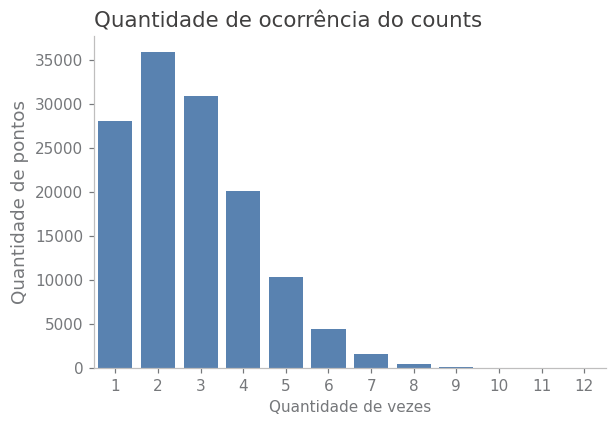

In [ ]:
# Criando uma figure, axes
# Importando as Bibliotecas 
import matplotlib.pyplot as plt
import seaborn as sns


fig, ax = plt.subplots(nrows = 1, ncols = 1, figsize=(6,4),       # (largura, altura) em polegadas 
                       dpi=110)                                   # resolução (pontos/polegada)

# Criando o gráfico de barras 
sns.barplot(x = df_quantidade.index, y = df_quantidade['counts'], ax=ax, color = '#4A81BF',data=df_quantidade)


# Remover/tirar o destaque das linhas

# Deixar invisível os eixos superior e direito
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

# Modificar a cor dos eixos inferior e esquerdo para cinza
ax.spines['bottom'].set_color('#BFBEBE')
ax.spines['left'].set_color('#BFBEBE')

# --------------- REPETINDO O PROCESSO ------------------------------
#Título -> notar que o título não está alinhado com o eixo
ax.set_title('Quantidade de ocorrência do counts', color = '#414040',loc='left', fontsize=14)

# Alinhar o texto
#ax.text(x= -1.5,y = 1650, s = 'Quantidade de itens vendidos por setor em 2017',color = '#929497',fontsize=14)

# Modificar a cor dos tiques para cinza (colocar uma cor menos intensa)
ax.tick_params(axis='both', colors ='#76787B',labelsize=10)         # modifica a aparência dos ticks, ticks labels e gridlines 


# Adicionar o label
ax.set_xlabel('Quantidade de vezes',color='#76787B')
ax.set_ylabel('Quantidade de pontos',color='#76787B',fontsize=12)

In [36]:
# condição: aparece 11 vezes ou 12 vezes ou 10 vezes
df_ponto = df_rj0_sub1.loc[(df_rj0_sub1['counts'] == 11) | (df_rj0_sub1['counts'] == 12)| (df_rj0_sub1['counts'] == 10),:]
#df_ponto = df_rj0_sub1.loc[(df_rj0_sub1['counts'] == 12),:]
df_ponto

,id,point,size,origin,region,vehicle_capacity,longitude,latitude,counts
142,4b652232fda99f7280ca4224491a598e,"{'lng': -42.86462331325438, 'lat': -22.7446192...",4,"{'lng': -43.09887838388887, 'lat': -22.8662298...",rj-0,180,-42.864623,-22.744619,10
466,7987b3933b062449ac3d0e8d1c15cce,"{'lng': -42.96728369098474, 'lat': -22.7907198...",5,"{'lng': -43.09887838388887, 'lat': -22.8662298...",rj-0,180,-42.967284,-22.790720,11
816,98e3222f3bcda413418362be6f9bc31a,"{'lng': -42.996841266041166, 'lat': -22.835706...",1,"{'lng': -43.09887838388887, 'lat': -22.8662298...",rj-0,180,-42.996841,-22.835707,10
2803,aeb9c8209dd73364be9ca4825111b7c9,"{'lng': -43.065992781910666, 'lat': -22.887630...",3,"{'lng': -43.09887838388887, 'lat': -22.8662298...",rj-0,180,-43.065993,-22.887631,12
2876,aca684a242e79fbe6873f4a5b3a21ea1,"{'lng': -43.06191290823435, 'lat': -22.8286437...",10,"{'lng': -43.09887838388887, 'lat': -22.8662298...",rj-0,180,-43.061913,-22.828644,10
3134,55b4faa6bfa48fc31f8ee9dbed3a3711,"{'lng': -43.10595035940253, 'lat': -22.9069269...",3,"{'lng': -43.09887838388887, 'lat': -22.8662298...",rj-0,180,-43.105950,-22.906927,10
5399,fda52b698b65c32ec31869b6fc2629bf,"{'lng': -43.037773022150446, 'lat': -22.906949...",4,"{'lng': -43.09887838388887, 'lat': -22.8662298...",rj-0,180,-43.037773,-22.906950,10
5918,da24244514bb80e0d00eafc5d72c7556,"{'lng': -43.059143497541974, 'lat': -22.906472...",2,"{'lng': -43.09887838388887, 'lat': -22.8662298...",rj-0,180,-43.059143,-22.906473,11
13162,743b584f48bf09287874ef95f33475ae,"{'lng': -43.08781988907568, 'lat': -22.8804935...",10,"{'lng': -43.09887838388887, 'lat': -22.8662298...",rj-0,180,-43.087820,-22.880494,11
14450,ade8f9ead2530130dc4e449506232129,"{'lng': -43.10144564427343, 'lat': -22.9002520...",8,"{'lng': -43.09887838388887, 'lat': -22.8662298...",rj-0,180,-43.101446,-22.900252,10


Text(0, 1, 'Latitude')

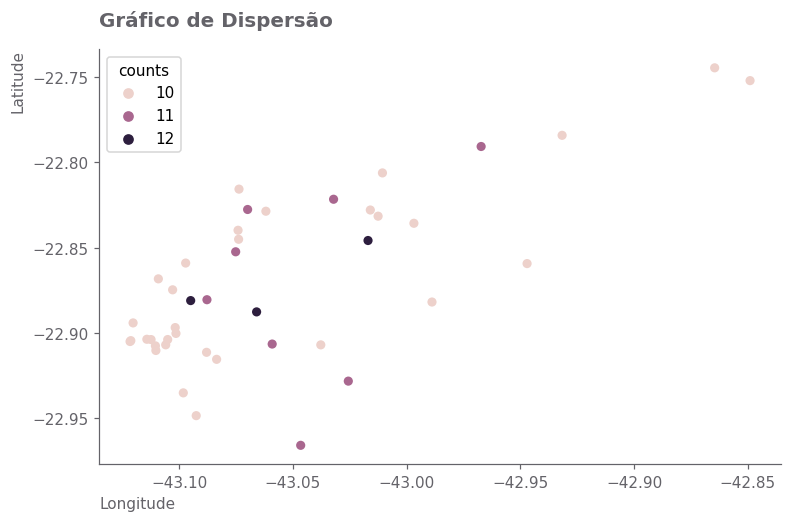

In [37]:
# Importando as Bibliotecas 
import matplotlib.pyplot as plt
import seaborn as sns

# Gráfico de Dispersão  (Scatterplot)

# ---------------------------------------------------------------------------------------
#                             Elementos básicos:
# ---------------------------------------------------------------------------------------

# 1 - Figure e axis
# Criando a variável fig e a variável ax   (figura, eixos):
fig, ax = plt.subplots(nrows = 1, ncols = 1, figsize=(8,5),       # (largura, altura) em polegadas 
                       dpi=110)                                   # resolução (pontos/polegada)

# 2 - Plot
# Gráfico de dispersão - total_bill (x), tip (y) de df1 
sns.scatterplot(data = df_ponto, x="longitude", y="latitude",hue = 'counts', linewidth = 0, ax = ax)    # cor opcional


# 3 - Título
# Inserindo título no nosso eixo ax
ax.set_title('Gráfico de Dispersão', color = '#646369',loc='left', pad = 15,fontsize=13, weight='bold')


# ---------------------------------------------------------------------------------------
#                    Melhorando o aspecto do gráfico:
# ---------------------------------------------------------------------------------------

# Modificar a cor dos tiques para cinza (colocar uma cor mais clara - chamar menos atenção):
ax.tick_params(axis='both', colors = '#646369',labelsize=10)         # modifica a aparência dos ticks, ticks labels e gridlines


# Remoção de eixos desnecessários (Closure):
ax.spines['right'].set_visible(False)       # deixa invisível os eixos direito
ax.spines['top'].set_visible(False)         # deixa invisível os eixos superior

# Modificar a cor dos eixos inferior e esquerdo para cinza
ax.spines['bottom'].set_color('#646369')       # inferior
ax.spines['left'].set_color('#646369')         # esquerdo

# Modificar o label
ax.set_xlabel('Longitude',color='#646369',fontsize=10,
              position=(0, 0), horizontalalignment='left')
ax.set_ylabel('Latitude', color='#646369', fontsize=10,
              position=(0,1), horizontalalignment='right')

Explicação do Gráfico: Esses são os pontos que apareceram em 10 instâncias, 11 instâncias e 12 instâncias. Ou seja, os pontos que mais se repetem.

#### 2.3 - Avaliando a distribuição da demanda

In [38]:
# resumo estatístico da distribuição da demanda
df_rj0_sub1['size'].describe()

count    131871.000000
mean          5.501786
std           2.868310
min           1.000000
25%           3.000000
50%           5.000000
75%           8.000000
max          10.000000
Name: size, dtype: float64

In [39]:
# tipos de variáveis de cada coluna
df_rj0_sub1.dtypes

id                   object
point                object
size                  int64
origin               object
region               object
vehicle_capacity      int64
longitude           float64
latitude            float64
counts                int64
dtype: object

Perceber que size (a demanda de cada ponto) é inteiro

In [40]:
# Quais os valores de demandas que temos?
df_demanda = pd.DataFrame(df_rj0_sub1['size'].value_counts())
df_demanda['porcentagem'] = round(100*df_demanda['size']/df_demanda['size'].sum(),2)      # adicionando a coluna porcentagem
df_demanda = df_demanda.sort_index()    # ordenando o index pela ordem crescente
df_demanda

,size,porcentagem
1,12978,9.84
2,13395,10.16
3,13082,9.92
4,13182,10.00
5,13346,10.12
6,13170,9.99
7,13222,10.03
8,13137,9.96
9,13206,10.01
10,13153,9.97


Criando um gráfico para mostrar a quantidade de vezes que cada demanda vai aparecer

Text(0, 0.5, 'Porcentagem (%)')

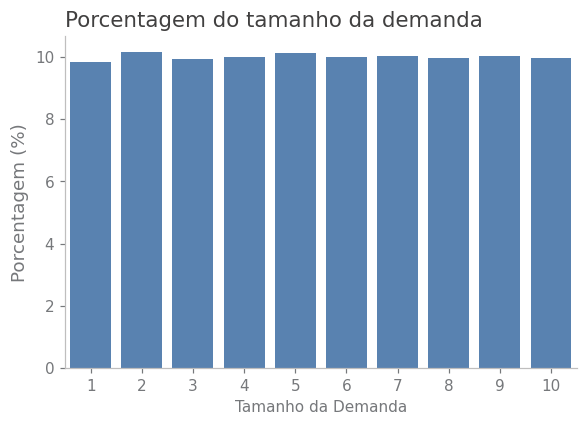

In [41]:
# Criando uma figure, axes
fig, ax = plt.subplots(nrows = 1, ncols = 1, figsize=(6,4),       # (largura, altura) em polegadas 
                       dpi=110)                                   # resolução (pontos/polegada)

# Criando o gráfico de barras 
sns.barplot(x = df_demanda.index, y = df_demanda['porcentagem'], ax=ax, color = '#4A81BF',data=df_demanda)


# Remover/tirar o destaque das linhas

# Deixar invisível os eixos superior e direito
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

# Modificar a cor dos eixos inferior e esquerdo para cinza
ax.spines['bottom'].set_color('#BFBEBE')
ax.spines['left'].set_color('#BFBEBE')

# --------------- REPETINDO O PROCESSO ------------------------------
#Título -> notar que o título não está alinhado com o eixo
ax.set_title('Porcentagem do tamanho da demanda', color = '#414040',loc='left', fontsize=14)

# Alinhar o texto
#ax.text(x= -1.5,y = 1650, s = 'Quantidade de itens vendidos por setor em 2017',color = '#929497',fontsize=14)

# Modificar a cor dos tiques para cinza (colocar uma cor menos intensa)
ax.tick_params(axis='both', colors ='#76787B',labelsize=10)         # modifica a aparência dos ticks, ticks labels e gridlines 


# Adicionar o label
ax.set_xlabel('Tamanho da Demanda',color='#76787B')
ax.set_ylabel('Porcentagem (%)',color='#76787B',fontsize=12)

Olhando o gráfico, podemos dizer que temos uma distribuição discreta uniforme do tamanho da demanda. 

### 3 - Gerador de subinstâncias

In [42]:
# Entradas:

## Demandas:
demandas = df_rj0_sub1['size'].unique()       # valores da demanda
d_min = demandas.min()
d_max = demandas.max() + 1

## Tamanho da Instância
tamanho_inst = 500  

#### 3.1 - Geração das demandas aleatórias dos Pontos

In [43]:
# Parte 1 - Geração das demandas aleatórias dos Pontos
import numpy as np
np.random.seed(seed=0)
dem_aleatorias = np.random.randint(low = d_min, high = d_max, size = tamanho_inst)   # Return random integers from low (inclusive) to high (exclusive)
dem_aleatorias

array([ 6,  1,  4,  4,  8, 10,  4,  6,  3,  5,  8,  7,  9,  9,  2,  7,  8,
        8,  9,  2,  6, 10,  9, 10,  5,  4,  1,  4,  6,  1,  3,  4,  9,  2,
        4,  4,  4,  8,  1,  2, 10, 10,  1,  5,  8,  4,  3,  8,  3,  1,  1,
        5,  6,  6,  7,  9,  5,  2,  5, 10,  9,  2,  2,  8, 10, 10,  4,  7,
        8,  3,  1,  4,  6, 10,  5,  5,  7,  5,  5,  4,  5,  5,  9,  5,  4,
        8,  6,  6,  1,  2,  6, 10,  4,  1,  6,  1,  2,  3,  5,  3,  1,  4,
        3,  1,  8,  6, 10,  1,  3,  8,  3, 10,  3,  4,  4,  3,  4,  5,  2,
        3, 10,  2,  5,  7,  9,  3,  4,  1,  1,  7,  1,  7,  4,  4,  9,  9,
        9,  3,  4,  3,  1,  9,  9,  4,  9,  3,  9,  5,  4,  1,  5,  4,  7,
       10,  9,  1,  9,  6, 10,  1, 10,  7,  6,  4,  2,  9,  1,  5, 10,  7,
        6,  8,  9,  9, 10,  3,  9,  7,  7, 10,  2,  7,  9,  9,  4,  3,  4,
        7,  4,  7,  6,  8,  1,  9,  5,  7,  6,  9,  3,  4, 10,  8,  6,  4,
        5,  6,  4,  4,  8, 10, 10, 10,  8,  4,  3,  4, 10,  8,  8,  6,  2,
        3,  3,  9,  2,  6

#### 3.2 - Seleção dos pontos de entrega de forma aleatória

In [45]:
# Parte 2 - Seleção dos pontos de entrega de forma aleatória

# 2.1 - selecionando os pontos e suas probabilidades
valores  = df_rj0['point'].value_counts()   # quantidade de vezes que os pontos aparecem
pontos = pd.DataFrame(valores)              # passando para dataframe
pontos['prob'] = pontos['point']/pontos['point'].sum()       # probabilidade de ocorrência de cada ponto
pontos.head(5)

,point,prob
"{'lng': -43.094973721097105, 'lat': -22.881007461621657}",12,0.000033
"{'lng': -43.01700691830846, 'lat': -22.845804713277975}",12,0.000033
"{'lng': -43.065992781910666, 'lat': -22.887630632019555}",12,0.000033
"{'lng': -43.08781988907568, 'lat': -22.880493577725904}",11,0.000030
"{'lng': -43.075194298933766, 'lat': -22.852413982571115}",11,0.000030


In [46]:
prob = pontos['prob'].values      # probabilidade de ocorrência do ponto
local = pontos.index.values       # pontos de entrega escolhidos

In [47]:
# Escolha Aleatória dos pontos  
np.random.seed(seed=0)
rotas_inst = np.random.choice(a = local, size = tamanho_inst, replace = False, p = prob)   # Generates a random sample from a given 1-D array
rotas_inst

array(["{'lng': -43.0874742824141, 'lat': -22.88578511148281}",
       "{'lng': -43.05445438655888, 'lat': -22.944565501165275}",
       "{'lng': -43.08268492983951, 'lat': -22.953660376624615}",
       "{'lng': -43.101672117037275, 'lat': -22.862892503432423}",
       "{'lng': -43.016917841526, 'lat': -22.81201014145326}",
       "{'lng': -42.97297697245905, 'lat': -22.8856672586525}",
       "{'lng': -43.01550717187334, 'lat': -22.8346213476799}",
       "{'lng': -43.04164003213277, 'lat': -22.819606672973862}",
       "{'lng': -42.87706835424294, 'lat': -22.784284987600543}",
       "{'lng': -42.9924359593385, 'lat': -22.815245801390983}",
       "{'lng': -43.11063559239027, 'lat': -22.897807700317287}",
       "{'lng': -43.10164490601015, 'lat': -22.90973794720474}",
       "{'lng': -42.86403778096802, 'lat': -22.782257792659223}",
       "{'lng': -43.01953830887621, 'lat': -22.93528692727839}",
       "{'lng': -42.98344569912169, 'lat': -22.779602235174455}",
       "{'lng': -43.1

#### 3.3 - Gerando gráfico do Toy

In [48]:
# Dataframe contém os pontos gerados aleatoriametne (rotas_inst) e as demandas geradas aleatoriamente (dem_aleatorias)
df_subinstancia = pd.DataFrame({'rotas': rotas_inst,'demandas': dem_aleatorias})
df_subinstancia.head(3)

,rotas,demandas
0,"{'lng': -43.0874742824141, 'lat': -22.88578511...",6
1,"{'lng': -43.05445438655888, 'lat': -22.9445655...",1
2,"{'lng': -43.08268492983951, 'lat': -22.9536603...",4


In [49]:
# Primeira rota - notar que temos dataframe. Então devemos fazer mesma coisa feita anteriormente, criar coluna latitude e longitude
df_subinstancia['rotas'][0]

"{'lng': -43.0874742824141, 'lat': -22.88578511148281}"

In [50]:
# criando a coluna latitude
df_subinstancia['latitude'] = df_subinstancia['rotas'].apply(lambda x: float(x.split(':')[2][:-1]))
df_subinstancia['longitude'] = df_subinstancia['rotas'].apply(lambda x: float(x.split(':')[1].split(',')[0]))

In [51]:
df_subinstancia.head(3)

,rotas,demandas,latitude,longitude
0,"{'lng': -43.0874742824141, 'lat': -22.88578511...",6,-22.885785,-43.087474
1,"{'lng': -43.05445438655888, 'lat': -22.9445655...",1,-22.944566,-43.054454
2,"{'lng': -43.08268492983951, 'lat': -22.9536603...",4,-22.953660,-43.082685


Text(0, 1, 'Latitude')

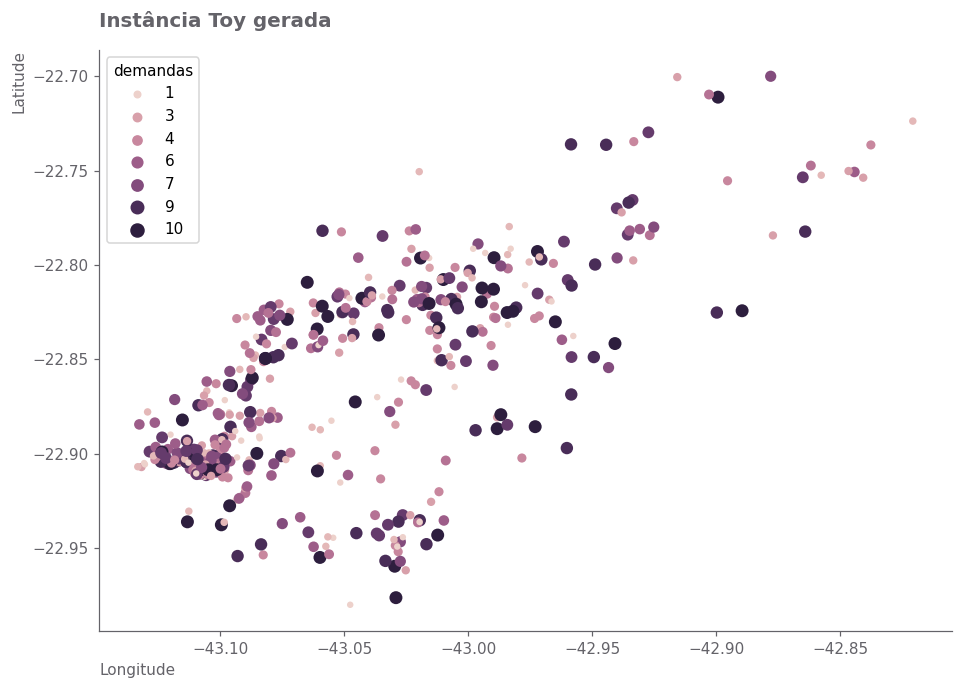

In [52]:
# Gerando gráfico 


# Importando as Bibliotecas 
import matplotlib.pyplot as plt
import seaborn as sns

# Gráfico de Dispersão  (Scatterplot)

# ---------------------------------------------------------------------------------------
#                             Elementos básicos:
# ---------------------------------------------------------------------------------------

# 1 - Figure e axis
# Criando a variável fig e a variável ax   (figura, eixos):
fig, ax = plt.subplots(nrows = 1, ncols = 1, figsize=(10,7),       # (largura, altura) em polegadas 
                       dpi=110)                                   # resolução (pontos/polegada)

# 2 - Plot
# Gráfico de dispersão - total_bill (x), tip (y) de df1 
sns.scatterplot(data = df_subinstancia, x="longitude", y="latitude",  linewidth = 0,  size="demandas", hue = 'demandas' , ax = ax)    # cor opcional


# 3 - Título
# Inserindo título no nosso eixo ax
ax.set_title('Instância Toy gerada', color = '#646369',loc='left', pad = 15,fontsize=13, weight='bold')


# ---------------------------------------------------------------------------------------
#                    Melhorando o aspecto do gráfico:
# ---------------------------------------------------------------------------------------

# Modificar a cor dos tiques para cinza (colocar uma cor mais clara - chamar menos atenção):
ax.tick_params(axis='both', colors = '#646369',labelsize=10)         # modifica a aparência dos ticks, ticks labels e gridlines


# Remoção de eixos desnecessários (Closure):
ax.spines['right'].set_visible(False)       # deixa invisível os eixos direito
ax.spines['top'].set_visible(False)         # deixa invisível os eixos superior

# Modificar a cor dos eixos inferior e esquerdo para cinza
ax.spines['bottom'].set_color('#646369')       # inferior
ax.spines['left'].set_color('#646369')         # esquerdo

# Modificar o label
ax.set_xlabel('Longitude',color='#646369',fontsize=10,
              position=(0, 0), horizontalalignment='left')
ax.set_ylabel('Latitude', color='#646369', fontsize=10,
              position=(0,1), horizontalalignment='right')

Exportando toy gerado:

In [ ]:
nome_arquivo = 'cvrp_RJ0_toy1'
salvar1 = '/content/drive/Shareddrives/Disciplina Modelagem/Aulas/Aula 3'

In [ ]:
df_subinstancia.to_csv(salvar1 + '/' + nome_arquivo)

### 4 - Resumo de todos os processos para gerar o toy

In [ ]:
## Entradas:

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

### dataframe onde serão pego as informações
df_rj0_sub1 = df_rj0_sub1.copy()        
df_rj0 = df_rj0.copy()

### Tamanho da Instância
tamanho_inst = 500  

### Exportar arquivo
nome_arquivo = 'cvrp_RJ0_toy1'
salvar1 = '/content/drive/Shareddrives/Disciplina Modelagem/Aulas/Aula 3'

In [ ]:
## TODO PROCESSO
# Parte 1 - Geração das demandas aleatórias dos Pontos:

demandas = df_rj0_sub1['size'].unique()       # valores da demanda
d_min = demandas.min()
d_max = demandas.max() + 1

np.random.seed(seed=0)
dem_aleatorias = np.random.randint(low = d_min, high = d_max, size = tamanho_inst)   # Return random integers from low (inclusive) to high (exclusive)

########################
# Parte 2 - Seleção dos pontos de entrega de forma aleatória

# 2.1 - selecionando os pontos e suas probabilidades
valores  = df_rj0['point'].value_counts()   # quantidade de vezes que os pontos aparecem
pontos = pd.DataFrame(valores)              # passando para dataframe
pontos['prob'] = pontos['point']/pontos['point'].sum()       # probabilidade de ocorrência de cada ponto

prob = pontos['prob'].values      # probabilidade de ocorrência do ponto
local = pontos.index.values       # pontos de entrega escolhidos

# Escolha Aleatória dos pontos  
np.random.seed(seed=0)
rotas_inst = np.random.choice(a = local, size = tamanho_inst, replace = False, p = prob)   # Generates a random sample from a given 1-D array

#############
# Parte 3

# Dataframe contém os pontos gerados aleatoriametne (rotas_inst) e as demandas geradas aleatoriamente (dem_aleatorias)
df_subinstancia = pd.DataFrame({'rotas': rotas_inst,'demandas': dem_aleatorias})

# criando a coluna latitude
df_subinstancia['latitude'] = df_subinstancia['rotas'].apply(lambda x: float(x.split(':')[2][:-1]))
df_subinstancia['longitude'] = df_subinstancia['rotas'].apply(lambda x: float(x.split(':')[1].split(',')[0]))


#############
# Parte 4 - Gerando gráfico 

fig, ax = plt.subplots(nrows = 1, ncols = 1, figsize=(10,7),       # (largura, altura) em polegadas 
                       dpi=110)                                   # resolução (pontos/polegada)
sns.scatterplot(data = df_subinstancia, x="longitude", y="latitude",  linewidth = 0,  size="demandas", hue = 'demandas' , ax = ax)    # cor opcional
ax.set_title('Instância Toy gerada', color = '#646369',loc='left', pad = 15,fontsize=13, weight='bold')
ax.tick_params(axis='both', colors = '#646369',labelsize=10)         # modifica a aparência dos ticks, ticks labels e gridlines
ax.spines['right'].set_visible(False)       # deixa invisível os eixos direito
ax.spines['top'].set_visible(False)         # deixa invisível os eixos superior
ax.spines['bottom'].set_color('#646369')       # inferior
ax.spines['left'].set_color('#646369')         # esquerdo
ax.set_xlabel('Longitude',color='#646369',fontsize=10,
              position=(0, 0), horizontalalignment='left')
ax.set_ylabel('Latitude', color='#646369', fontsize=10,
              position=(0,1), horizontalalignment='right')


#############
# Parte 5 - Exportando o resultado
df_subinstancia.to_csv(salvar1 + '/' + nome_arquivo)
